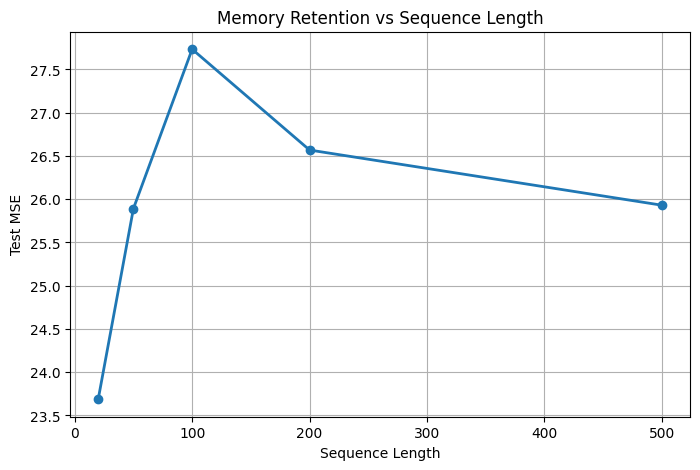

Memory performance (MSE) across sequence lengths:
Length 20: MSE 23.686970
Length 50: MSE 25.891420
Length 100: MSE 27.733810
Length 200: MSE 26.568138
Length 500: MSE 25.930359


In [1]:
# Import libraries
import sys
import os

sys.path.append(os.path.abspath(".."))
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

from src.models.gated_ssm import GatedSSM
from src.data.long_context import copy_task

# ----------------------------
# Experiment setup
# ----------------------------
input_dim = 1
hidden_dim = 32
batch_size = 8
max_seq_len = 500

sequence_lengths = [20, 50, 100, 200, 500]  # lengths to evaluate

# Model
model = GatedSSM(input_dim, hidden_dim)

model.eval()  # evaluation mode

# ----------------------------
# Synthetic copy task function
# ----------------------------
def evaluate_memory(model, seq_lengths):
    results = {}
    for L in seq_lengths:
        X_test, Y_test = copy_task(L, batch_size=4)
        X_test = torch.tensor(X_test).unsqueeze(-1)
        Y_test = torch.tensor(Y_test).unsqueeze(-1)
        
        with torch.no_grad():
            out_test = model(X_test)
            mse = nn.MSELoss()(out_test, Y_test).item()
            results[L] = mse
    return results

# ----------------------------
# Run evaluation
# ----------------------------
memory_results = evaluate_memory(model, sequence_lengths)

# ----------------------------
# Plot memory decay curve
# ----------------------------
plt.figure(figsize=(8,5))
plt.plot(list(memory_results.keys()), list(memory_results.values()), marker='o', linewidth=2)
plt.title("Memory Retention vs Sequence Length")
plt.xlabel("Sequence Length")
plt.ylabel("Test MSE")
plt.grid(True)
plt.show()

# ----------------------------
# Detailed view
# ----------------------------
print("Memory performance (MSE) across sequence lengths:")
for L, mse in memory_results.items():
    print(f"Length {L}: MSE {mse:.6f}")
